# Classification - Logistic Regression on the Titanic Dataset

### This project to get hands-on with classification techniques! Here’s a step-by-step guide to help you through every stage of building a logistic regression model for the Titanic dataset:

### 1. Import Required Libraries

In [2]:
# Data Manipulation and visualization reqiured
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#LogisticRegression required libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score,roc_curve


### 2. Data Set Loading

In [5]:
df = sns.load_dataset('titanic')

#print 5 top row records
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 3.Preview Data

In [6]:
df.shape

(891, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 4. Data Preprocessing

##### i) null value treatment


In [9]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [15]:
# nulmerical columns null value treatment


# Fill 'Age' with median
df['age'].fillna(df['age'].median(), inplace=True)


In [14]:
# Categorical columns null values treatment

#fill 'Deck' with mode
df['deck'].fillna(df['deck'].mode()[0],inplace=True)

# Fill 'Embarked' with mode
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

#fill 'embark_town' with mode
df['embark_town'].fillna(df['embark_town'].mode()[0],inplace=True)

##### ii) Encoding Categorical variable

In [21]:
# Convert 'Sex' and 'Embarked' using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

##### iii) Feature Scaling

In [22]:
scaler = StandardScaler()
df[['age', 'fare']] = scaler.fit_transform(df[['age', 'fare']])


### 5. Split Data Into Training and Testing Session

In [23]:
# Define features and target
x = df.drop('survived', axis=1)
y = df['survived']

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y)


### 6. Model Building 

In [25]:
# Initialize and train the model
model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

### 7. Model Prediction and evaluation

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00        69

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



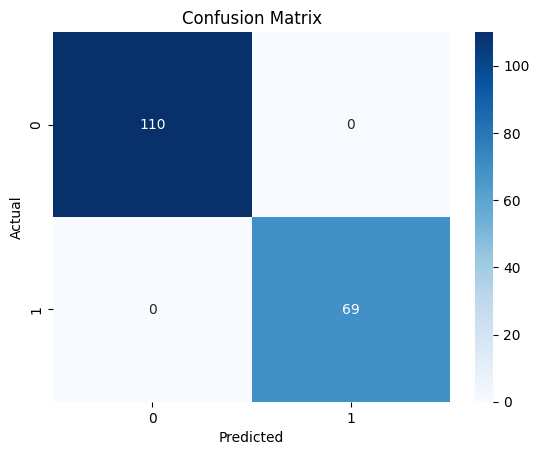

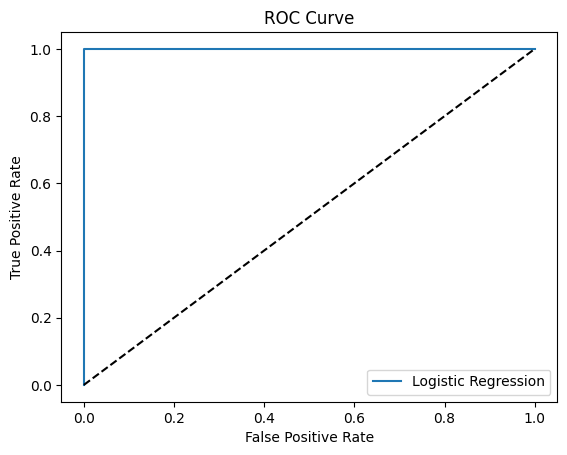

ROC AUC Score: 1.0


In [26]:
# Make predictions
y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)[:, 1]

# Accuracy & Classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


### 8. Feature Engineering

##### i) family size

In [29]:
df['FamilySize'] = df['sibsp'] + df['parch'] + 1

##### ii) Is alone

In [30]:
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)


### Cross validation

In [32]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x, y, cv=5)
print("Cross-Validation Accuracy Scores:", scores)
print("Mean CV Accuracy:", scores.mean())


Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0
